In [2]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU

In [3]:
end_date = datetime.now().strftime('%Y-%m-%d')
ydata=yf.download('ICP-USD',
                      start='2020-01-01',
                      end=end_date,
                      progress=False)
ydata.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-05-10,0.000000,750.730469,0.000000,428.362305,428.362305,290834080
2021-05-11,428.484161,580.378479,346.179901,364.789978,364.789978,1667242972
2021-05-12,366.946564,387.595184,255.494247,255.494247,255.494247,1029335147
2021-05-13,255.637650,344.925629,252.070862,300.020386,300.020386,886643614
2021-05-14,301.248505,340.414673,292.912170,304.185181,304.185181,471523354


In [4]:
ydata.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-12,14.980361,15.284964,13.765269,14.691688,14.691688,224210825
2024-03-13,14.691688,14.872741,14.071096,14.501324,14.501324,195688326
2024-03-14,14.501324,14.654051,13.261741,13.928456,13.928456,236630195
2024-03-15,13.928456,14.080368,12.113690,12.843906,12.843906,247410895
2024-03-16,12.843906,13.231393,11.972938,12.237168,12.237168,171402836


In [5]:
ydata.shape

(1042, 6)

In [6]:
ydata.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1.042000e+03
mean,20.451371,22.594190,18.926100,20.461962,20.461962,1.756426e+08
std,33.816751,44.677742,29.092768,33.795397,33.795397,2.225238e+08
min,0.000000,2.936376,0.000000,2.900906,2.900906,7.166726e+06
25%,4.827280,4.966100,4.677542,4.831450,4.831450,3.334157e+07
50%,6.913908,7.322431,6.549564,6.926027,6.926027,9.109064e+07
75%,22.510342,23.446292,21.468559,22.509954,22.509954,2.431386e+08
max,428.484161,750.730469,346.179901,428.362305,428.362305,1.766367e+09


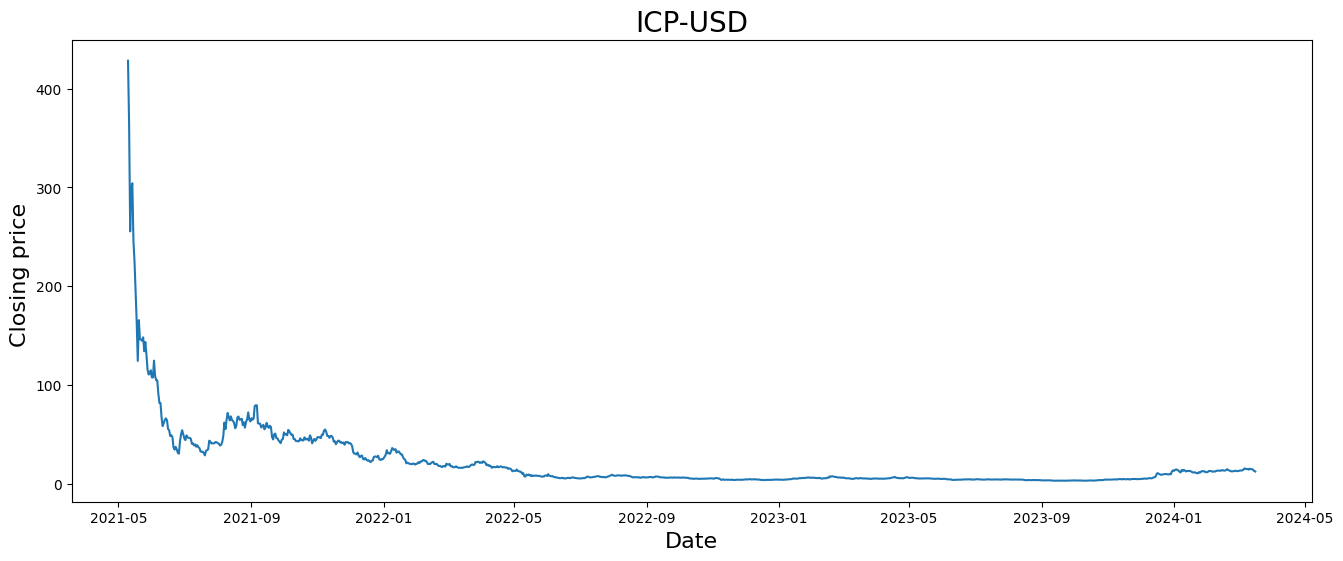

In [7]:
plt.figure(figsize=(16,6))
plt.title("ICP-USD", fontsize=20)
plt.plot(ydata['Close'])
plt.xlabel("Date", fontsize=16)
plt.ylabel("Closing price ", fontsize=16)
plt.show()

In [10]:
close_data= ydata.filter(['Close'])
data=close_data.values

train_len = math.ceil(len(data) * 0.8)
data

array([[428.36230469],
       [364.78997803],
       [255.49424744],
       ...,
       [ 13.92845631],
       [ 12.8439064 ],
       [ 12.23716831]])

In [11]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)
print(scaled_data.min(), scaled_data.max(), scaled_data.mean())
scaled_data

0.0 1.0000000000000002 0.041275321692417676


array([[1.        ],
       [0.85058027],
       [0.59369273],
       ...,
       [0.02591904],
       [0.02336992],
       [0.02194385]])

In [12]:
train_data = scaled_data[0:train_len, :]
x_train = []
y_train = []
print(len(train_data))

834


In [13]:
num_of_days=60
for i in range(num_of_days, len(train_data)):
  x_train.append(train_data[i-num_of_days:i, 0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([1.        , 0.85058027, 0.59369273, 0.6983465 , 0.70813539,
       0.57143336, 0.5222233 , 0.45373611, 0.37949606, 0.2852896 ,
       0.38231652, 0.3366971 , 0.33622782, 0.33307501, 0.34141434,
       0.30822148, 0.33027334, 0.30062521, 0.26527522, 0.25293921,
       0.25490512, 0.26301118, 0.24607   , 0.24574412, 0.28592098,
       0.24932689, 0.2393755 , 0.23900879, 0.20730937, 0.18505837,
       0.18483449, 0.14969557, 0.13006352, 0.13703797, 0.1449418 ,
       0.14838185, 0.14365069, 0.12298389, 0.12012168, 0.10626609,
       0.10850883, 0.10414687, 0.07959555, 0.07406741, 0.08074531,
       0.07460261, 0.06650797, 0.064393  , 0.0940096 , 0.11116016,
       0.12025949, 0.11049212, 0.10092671, 0.0965933 , 0.10790733,
       0.10330123, 0.10194888, 0.10176244, 0.0997923 , 0.08783974])]
[0.08856801935914393]

[array([1.        , 0.85058027, 0.59369273, 0.6983465 , 0.70813539,
       0.57143336, 0.5222233 , 0.45373611, 0.37949606, 0.2852896 ,
       0.38231652, 0.3366971 , 0.33

In [14]:
x_train, y_train = np.array(x_train), np.array(y_train)
print(len(x_train), len(y_train))

774 774


In [15]:
print(x_train.shape)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train.shape)

(774, 60)
(774, 60, 1)


##1/Sequential Model:

Sequential data processing: The model processes sequential data, such as time series or sequences of text.

##2/LSTM Layer with 50 units:
Type: Long Short-Term Memory (LSTM) layer
Units: 50
Output: Returns sequential data (because return_sequences=True)
This layer captures complex temporal dependencies in the input data.

##3/Dense Layer with 25 units:
Type: Fully connected Dense layer
Units: 25
Output: Non-sequential data
This layer introduces additional complexity and abstraction to the features extracted by the LSTM layer.

##4/Dense Output Layer with 1 unit:
Type: Fully connected Dense layer
Units: 1
Output: Non-sequential data
This layer produces the final output.

In [16]:
# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31901 (124.61 KB)
Trainable params: 31901 (124.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [18]:
model.fit(x_train, y_train, batch_size=8, epochs=10)

Epoch 1/10
97/97 [==============================] - 9s 45ms/step - loss: 2.4354e-04
Epoch 2/10
97/97 [==============================] - 6s 59ms/step - loss: 1.1276e-04
Epoch 3/10
97/97 [==============================] - 12s 124ms/step - loss: 9.0290e-05
Epoch 4/10
97/97 [==============================] - 9s 90ms/step - loss: 6.3918e-05
Epoch 5/10
97/97 [==============================] - 5s 54ms/step - loss: 8.7938e-05
Epoch 6/10
97/97 [==============================] - 4s 42ms/step - loss: 6.1492e-05
Epoch 7/10
97/97 [==============================] - 5s 47ms/step - loss: 6.5297e-05
Epoch 8/10
97/97 [==============================] - 5s 50ms/step - loss: 5.6016e-05
Epoch 9/10
97/97 [==============================] - 4s 45ms/step - loss: 4.5111e-05
Epoch 10/10
97/97 [==============================] - 5s 56ms/step - loss: 4.6555e-05


In [19]:
test_data = scaled_data[train_len-num_of_days:, :]
x_test = []
y_test = data[train_len:, :]
for i in range(num_of_days, len(test_data)):
  x_test.append(test_data[i-num_of_days:i, 0])
x_test = np.array(x_test)
print(x_test.shape)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(x_test.shape)

(208, 60)
(208, 60, 1)


In [25]:
print(x_test)

[[[0.0033606 ]
  [0.00320783]
  [0.00335771]
  ...
  [0.00154303]
  [0.00160643]
  [0.00138538]]

 [[0.00320783]
  [0.00335771]
  [0.0031757 ]
  ...
  [0.00160643]
  [0.00138538]
  [0.00122877]]

 [[0.00335771]
  [0.0031757 ]
  [0.00336348]
  ...
  [0.00138538]
  [0.00122877]
  [0.00164604]]

 ...

 [[0.02282791]
  [0.02348319]
  [0.02297234]
  ...
  [0.02839142]
  [0.02771293]
  [0.0272655 ]]

 [[0.02348319]
  [0.02297234]
  [0.02168414]
  ...
  [0.02771293]
  [0.0272655 ]
  [0.02591904]]

 [[0.02297234]
  [0.02168414]
  [0.02014823]
  ...
  [0.0272655 ]
  [0.02591904]
  [0.02336992]]]


In [20]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

7/7 [==============================] - 2s 23ms/step


In [21]:
train = close_data[:train_len]
valid = close_data[train_len:].copy()
print(valid)

                Close
Date                 
2023-08-22   3.423700
2023-08-23   3.601232
2023-08-24   3.600696
2023-08-25   3.510115
2023-08-26   3.551465
...               ...
2024-03-12  14.691688
2024-03-13  14.501324
2024-03-14  13.928456
2024-03-15  12.843906
2024-03-16  12.237168

[208 rows x 1 columns]


In [23]:
valid['Predictions'] = predictions
print(valid)

                Close  Predictions
Date                              
2023-08-22   3.423700     2.272285
2023-08-23   3.601232     2.234843
2023-08-24   3.600696     2.234417
2023-08-25   3.510115     2.251411
2023-08-26   3.551465     2.258168
...               ...          ...
2024-03-12  14.691688    13.424245
2024-03-13  14.501324    13.440245
2024-03-14  13.928456    13.401815
2024-03-15  12.843906    13.243517
2024-03-16  12.237168    12.866876

[208 rows x 2 columns]


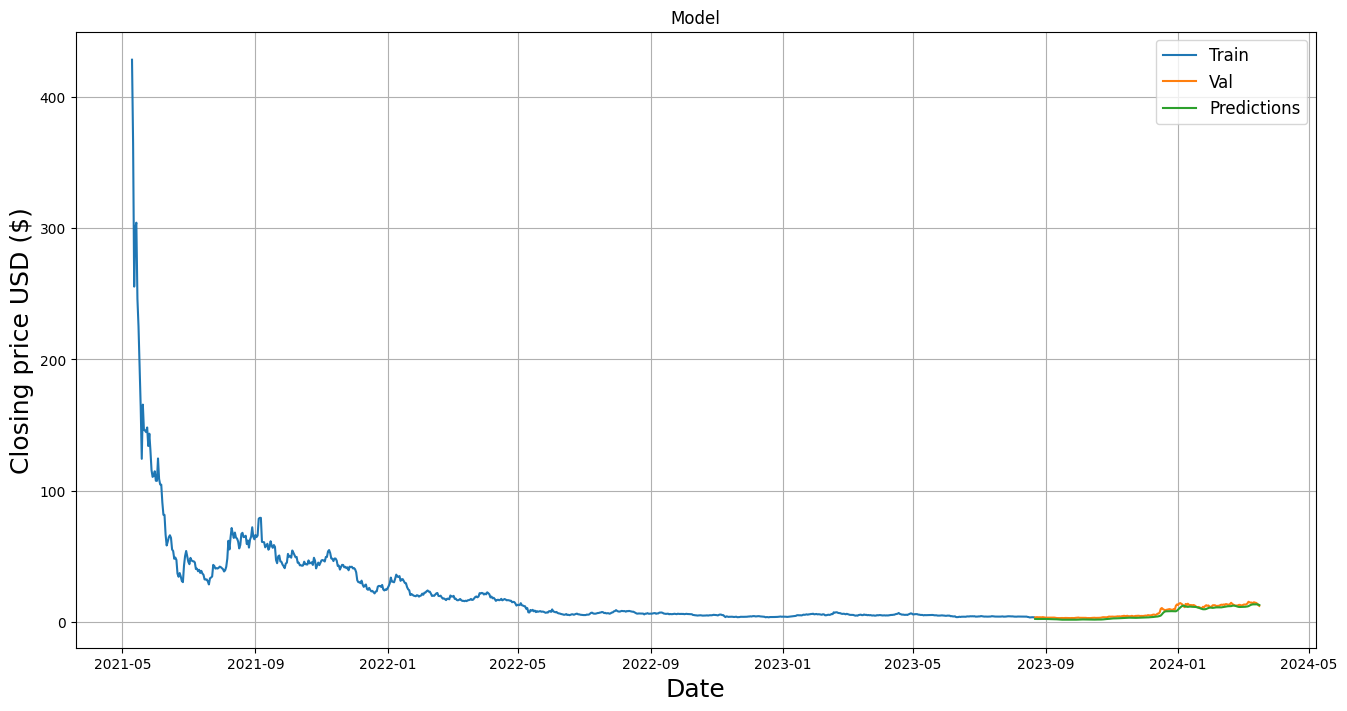

In [26]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], fontsize=12)
plt.grid(True)
plt.show()

In [46]:
recent_data = scaled_data[-num_of_days:].reshape(1, num_of_days, 1)

future_predictions = []

for _ in range(30):
    next_prediction = model.predict(recent_data)
    future_predictions.append(next_prediction[0][0])

    recent_data = np.append(recent_data[:, 1:, :], next_prediction.reshape(1, 1, 1), axis=1)

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

print("Predictions for the next 10 days:")
for i, prediction in enumerate(future_predictions, 1):
    print(f"Day {i}: Predicted Close Value = {prediction[0]}")


1/1 [==============================] - 0s 31ms/step
Predictions for the next 10 days:
Day 1: Predicted Close Value = 12.34843921661377
Day 2: Predicted Close Value = 11.87356948852539
Day 3: Predicted Close Value = 11.417986869812012
Day 4: Predicted Close Value = 10.972055435180664
Day 5: Predicted Close Value = 10.532207489013672
Day 6: Predicted Close Value = 10.097259521484375
Day 7: Predicted Close Value = 9.666865348815918
Day 8: Predicted Close Value = 9.240899085998535
Day 9: Predicted Close Value = 8.819214820861816
Day 10: Predicted Close Value = 8.401588439941406
Day 11: Predicted Close Value = 7.9877190589904785
Day 12: Predicted Close Value = 7.577247142791748
Day 13: Predicted Close Value = 7.169785499572754
Day 14: Predicted Close Value = 6.764943599700928
Day 15: Predicted Close Value = 6.3623433113098145
Day 16: Predicted Close Value = 5.961636543273926
Day 17: Predicted Close Value = 5.5625104904174805
Day 18: Predicted Close Value = 5.164690017700195
Day 19: Predicte

In [42]:
print(close_data)

                 Close
Date                  
2021-05-10  428.362305
2021-05-11  364.789978
2021-05-12  255.494247
2021-05-13  300.020386
2021-05-14  304.185181
...                ...
2024-03-12   14.691688
2024-03-13   14.501324
2024-03-14   13.928456
2024-03-15   12.843906
2024-03-16   12.237168

[1042 rows x 1 columns]


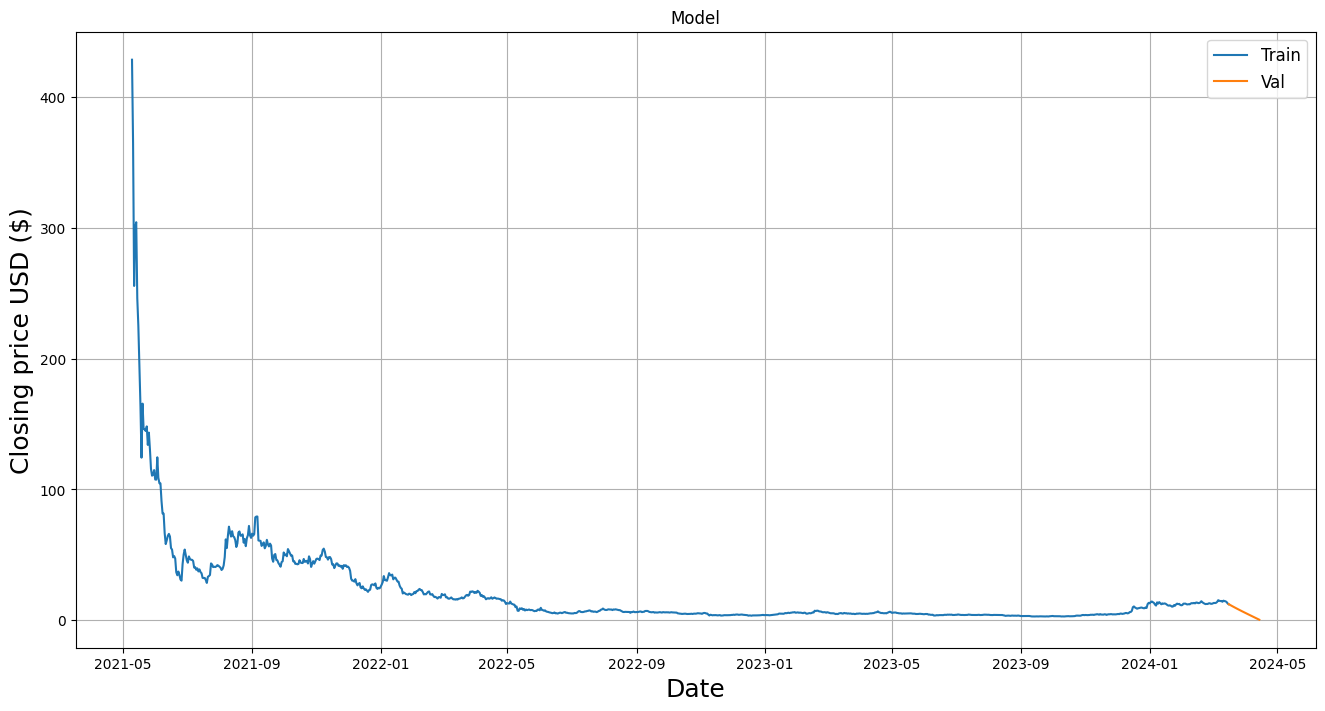

In [47]:
# Generate date indices for future predictions
last_date = ydata.index[-1]
future_dates = pd.date_range(start=last_date, periods=30)

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing price USD ($)', fontsize=18)
plt.plot(close_data['Close'])

plt.plot(future_dates, future_predictions)

plt.legend(['Train', 'Val', 'Future predictions'], fontsize=12)
plt.grid(True)
plt.show()
